In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

/home/tian/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [2]:
column_names = [ 'TPA 18hrs', 'TPA 36hrs', 'MHET 18hrs', 'MHET 36hrs', 'Mutation Type', 'Site Number', 'Percent Activity']
dataset_pet = pd.read_csv("PETase_Data.csv", sep=',', header=None, names=column_names)
dataset_pet

,TPA 18hrs,TPA 36hrs,MHET 18hrs,MHET 36hrs,Mutation Type,Site Number,Percent Activity
0,1.3,2.5,1.7,2.5,0,0,100
1,0.0,0.0,0.0,0.0,1,160,0
2,0.0,0.0,0.0,0.0,-2,206,1
3,0.0,0.0,0.0,0.0,-2,237,1
4,0.5,1.0,0.7,1.3,-2,87,5
5,0.6,1.0,1.0,1.2,-1,161,53
6,0.4,0.5,0.4,0.4,-3,185,5
7,0.2,0.3,0.6,0.6,-1,208,49
8,0.4,0.5,0.4,0.5,-3,159,9
9,1.3,2.2,1.6,1.7,1,238,83


In [3]:

dataset_pet.tail()

,TPA 18hrs,TPA 36hrs,MHET 18hrs,MHET 36hrs,Mutation Type,Site Number,Percent Activity
11,1.4,2.7,2.2,3.2,-1,280,100
12,0.7,1.1,0.8,1.5,-2,159,20
13,1.0,1.3,0.5,1.5,-2,238,41
14,0.5,0.6,0.3,0.3,0,203,1
15,0.5,0.6,0.3,0.3,0,239,1


In [4]:
dataset_pet.isna().sum()

TPA 18hrs           0
TPA 36hrs           0
MHET 18hrs          0
MHET 36hrs          0
Mutation Type       0
Site Number         0
Percent Activity    0
dtype: int64

In [5]:
train_dataset_pet = dataset_pet.sample(frac=0.6, random_state=0)
test_dataset_pet = dataset_pet.drop(train_dataset_pet.index)

In [6]:
test_dataset_pet

,TPA 18hrs,TPA 36hrs,MHET 18hrs,MHET 36hrs,Mutation Type,Site Number,Percent Activity
0,1.3,2.5,1.7,2.5,0,0,100
3,0.0,0.0,0.0,0.0,-2,237,1
5,0.6,1.0,1.0,1.2,-1,161,53
11,1.4,2.7,2.2,3.2,-1,280,100
12,0.7,1.1,0.8,1.5,-2,159,20
15,0.5,0.6,0.3,0.3,0,239,1


In [7]:
#sns.pairplot(train_dataset_pet[["TPA 18hrs", "TPA 36hrs", "MHET 18hrs", "MHET 36hrs", "Mutation Type", "Site Number"]], diag_kind="kde")

In [8]:
train_stats = train_dataset_pet.describe()
train_stats.pop("Percent Activity")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TPA 18hrs,10.0,0.44,0.424788,0.0,0.125,0.40,0.500,1.3
TPA 36hrs,10.0,0.66,0.680196,0.0,0.225,0.50,0.900,2.2
MHET 18hrs,10.0,0.50,0.449691,0.0,0.325,0.45,0.575,1.6
MHET 36hrs,10.0,0.69,0.604520,0.0,0.325,0.55,1.125,1.7
Mutation Type,10.0,-1.30,1.494434,-3.0,-2.000,-2.00,-0.250,1.0
Site Number,10.0,192.50,47.598436,87.0,166.250,204.50,230.500,241.0


In [9]:
train_labels = train_dataset_pet.pop('Percent Activity')
test_labels = test_dataset_pet.pop('Percent Activity')

In [10]:
def norm(x):
    return (x - train_stats['mean'])/ train_stats['std']
normed_train_data = norm(train_dataset_pet)
normed_test_data = norm(test_dataset_pet)

In [11]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.softmax, input_shape=[len(train_dataset_pet.keys())]),
        layers.Dense(64, activation=tf.nn.tanh),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.01)
    
    model.compile(loss='mean_squared_error',
                 optimizer=optimizer,
                 metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [12]:
model = build_model()

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [14]:
example_batch = normed_train_data[:8]
example_result = model.predict(example_batch)
example_result

array([[-0.00794068],
       [ 0.00149942],
       [ 0.00353553],
       [-0.03583304],
       [-0.00890136],
       [ 0.00657417],
       [-0.00163774],
       [-0.01426745]], dtype=float32)

In [15]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch %100 == 0: print(' ')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])

 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
.................................................................................................... 
................................................................................

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,1052.421753,29.491079,1052.421753,0.660524,0.754513,0.660524,995
996,1165.275757,31.335007,1165.275757,0.660348,0.764321,0.660348,996
997,1053.980591,29.517134,1053.980591,0.644459,0.750769,0.644459,997
998,1164.540649,31.321892,1164.540649,0.641017,0.747179,0.641017,998
999,1055.282471,29.539307,1055.282471,0.634661,0.757419,0.634661,999


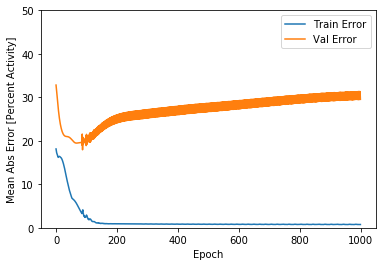

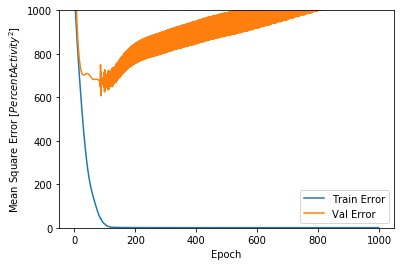

In [17]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Percent Activity]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val Error')
    plt.ylim([0,50])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Percent Activity^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='Val Error')
    plt.ylim([0,1000])
    plt.legend()
    plt.show()
    
plot_history(history)

 
.............................................

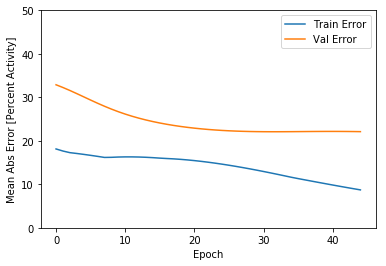

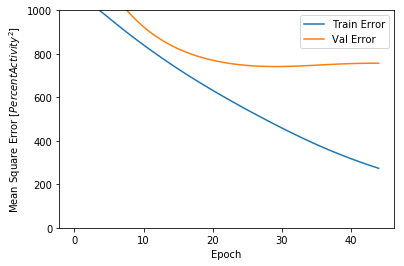

In [18]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=15)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [19]:
loss, mae, mse = model.evaluate(test_dataset_pet, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} Percent Activity".format(mae))

Testing set Mean Abs Error: 38.00 Percent Activity


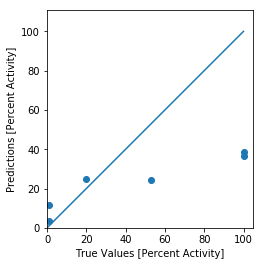

In [20]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Percent Activity]')
plt.ylabel('Predictions [Percent Activity]')
plt.axis('Equal')
plt.axis('Square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_= plt.plot([-100, 100], [-100,100])

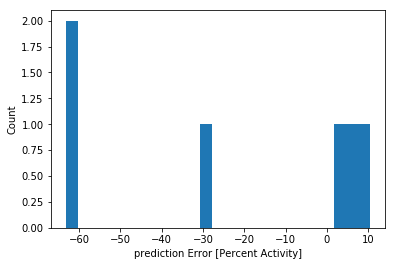

In [21]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("prediction Error [Percent Activity]")
_= plt.ylabel("Count")